# 단순선형회귀

독립변수($x$)의 변화에 따른 종속변수($y$)를 추론하는 통계.

하나의 독립변수와 하나의 종속변수가 주어진다. $y=ax+b$

가장 심플한 형태의 회귀분석

파이썬에서는 statemodels 패키지와 sklearn패키지가 회귀분석 기능을 제공한다.
> sklearn은 머신러닝에 속하기 때문에 여기서는 statemodels만 살펴봄

## #01. 작업준비

### 패키지 참조

In [1]:
from pandas import read_excel
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

In [2]:
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

### 데이터 가져오기

자동차의 속도(speed)에 따른 제동거리(dist)

In [ ]:
df = read_excel("https://data.hossam.kr/E04/cars.xlsx")
df

## #02. 탐색적 데이터 분석

### 산점도 그래프

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.unicode_minus'] = False

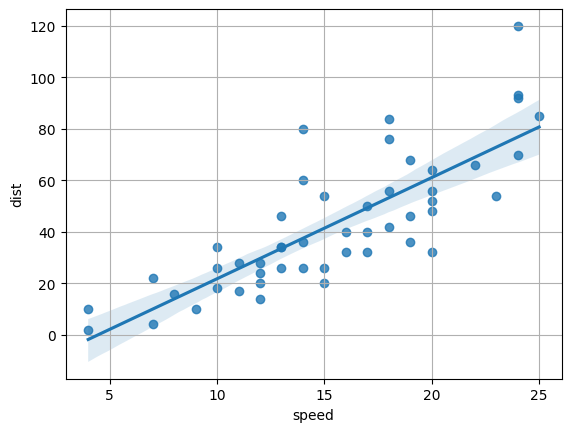

In [8]:
sb.regplot(df, x='speed', y='dist')
plt.grid()
plt.show()
plt.close()


## #03. 추론통계

### 1) 상관분석

In [9]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
speedvsdist,0.806895,1.489836e-12,True
distvsspeed,0.806895,1.489836e-12,True


> 상관분석 결과 : p-value가 0.05보다 작으므로 속도와 제동거리 간의 양의 상관관계가 통계적으로 유의함을 알 수 있다.

### 2) 회귀분석

$y=ax+b$에 따라 `종속~독립` 형태로 표현식을 구성한다.

#### 분석을 위한 학습모델 구성 

In [13]:
model = ols("dist ~ speed", data=df)
model

#### 분석수행

In [14]:
fit = model.fit()
fit

#### 분석결과 수행

In [15]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.49e-12
Time:                        15:19:24   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

#### (1) 모형적합도 해석

![모형적합도](모형적합도.png)


모형이 데이터에 얼마나 맞는지 확인하는 지표

|결과|해석|
|---|---|
|R-squared (R제곱,결정계수)|모형의 설명력을 의미.<br> dist제동거리를 speed가 약 65% 설명한다.|
| Adj. R-squared |독립변수가 여러개인 다중회귀분석에서 사용 <br>독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정 <br>서로 다른 모형을 비교할 때는 이 지표가 높은 쪽을 선택한다. <br>독립변수가 하나이면 차이가 없음. |
|F-statistic , Prob(F-statistic) :1.49e-12 | 회귀모형에 대한 (통계적) 유의미성 검증결과, 유의미함 ( p < 0.05)즉, 이 모형은 주어진 표본 뿐만 아니라 모집단에서도 의미있는 모형이라 할 수 있음. |
|AIC, BIC | 로그우도- 종속변수가 정규분포라고 가정했을 때의 우도.<br> 로그우도를 독립변수의 수로 보정한 값(작을수록 좋다) <br> [윤인수] AIC 와 BIC는 간단하게 얼마나 저희가 만든 회귀분석 모델이 데이터에 잘 fit하는지를 의미해요.우도가 likelihood를 의미하는 것 같은데 수식적으로 AIC = 2k - 2ln(L) k는 독립변수 수 L은 저희가 준 모델에서 데이터의 likelihood입니다. 그래서 BIC는 뭐가 차이가 있느냐 BIC =k*ln(n) -2ln(L) 입니다. n이 샘플의 크기인것을 보아 BIC는 아마 6이상이되면 AIC보다 커지기 쉽습니다. 즉 BIC는 독립변수가 너무 많은 모델이 데이터를 fit하는 것에 penalty를 준 개념입니다.|

#### 독립변수보고 해석

![독립변수보고해석](./독립변수보고.png)

|결과|해석|
|--|---|
|회귀계수(coef)|데이터로부터 얻은 계수의 추정치 <br> intercept = 절편(b) speed coef = 기울기(a) <br> 절편(Intercept)의 추정치는 -17.5791로, speed가 0일때 dist의 값 <br> speed의 계수 추정치는 3.9324로 speed가 1 증가할때마다 dist가 3.9324 증가한다는 것을 의미 <br> $dist = -17.5791+ 3.9324\times speed$ |
| p값 | 모집단에서 계수가 0일때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률 <br> 이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미 <br> 보통 5%와 같은 유의수준 |

## #04. 결과보고

결과해석과 결과보고는 다르다. <br>
영향을 주는 요인을 찾아내고 얼마나 영향을 주는지 알려줘야함. 

### 모형적합도 보고

F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

'''
dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다.
(F(1,48) = 89.57 , p < 0.05)
'''

### 독립변수에 대해 보고
'''
speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다.(t(48) = 9.464, p<0.05)
'''


## 05. 분석결과 해석 (보충)

![result](./result-all.png)

### 모형적합도 해석
모형이 데이터에 잘 맞는 정도를 보여주는 지표

|번호|이름|설명|
|---|---|---|
|1|R-squared|R제곱, 결정계수 <br> 모형의 설명력을 의미 <br> dist 제동거리를 speed가 약 65% 설명한다. (각 사례마다 dist에 차이가 있다.)|
|2|Adf.R-squared|독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정한 값.<br> 서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다. <br> 독립변수가 여러 개인 다중회귀분석에서 사용|
|3|F-statistic|회귀모형에 대한 (통계적) 유의미성 검증 결과|
|4|Prob(F-statistic)|F-statistic에 대한 p-value. <br> 유의미함 (p < 0.05)|
|5|Log-Likehood|로그 우도: 종속변수가 정규분포라고 가정했을 때의 우도|
|6|AIC, BIC|로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)|

### 회귀계수(coef) 해석
|번호|이름|설명|
|---|---|---|
|7|절편(intercept)|speed가 0일때 dist의 값|
|8|기울기|독립변수인 speed가 1 증가할 때마다 dist가 3.9324 증가한다는 것을 의미|

이를 수식으로 정리 <br>
$dist= 7 + 8 \times 독립변수 $ <br>
즉, 
$dist= -17.5791 + 3.9324 \times speed $ <br>

### p값
|번호|이름|설명|
|---|---|---|
|9|p값|모집단에서 계수가 0일때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률|

이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미 

보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 정리
> speed가 증가할 때 기대되는 dist의 변화는 유의수준 5%에서 통계적으로 유의하다.


## #06. 결과보고 (보충)

### 모형적합도 보고
F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

$F(10번,11번) = 3번, p < 0.05

모형적합도 보고 예시
> dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다.
> #(F(1,48) = 89.57, p<0.05)

### 독립변수에 대한 보고
t(11번) = 12번, p < 0.05


독립변수 보고 예시
> speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다.
> (t(48) = 9.464, p < 0.05)